<a href="https://colab.research.google.com/github/shrutin11/Deep-Learning-and-Computer-Vision-Lab/blob/main/2_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question:
> Analyze the performance of CNN on the image dataset.
>
> a.       Load the dataset as input.
>
> b.       Change the hyper-parameter (Varying with different convolutional and pooling layer) of classification model and analyze its performance.
>
> c.       Evaluate and compare the model performance by using metrics – classification accuracy and Binary Cross Entropy Loss.

# Analysis

### Load MNIST Dataset:

> The MNIST dataset is loaded using the mnist.load_data() function. It consists of two sets:
>
> - training data (x_train, y_train)
>
> - testing data (x_test, y_test)

### Preprocess Data:

> The images in the dataset are reshaped to have a depth of 1 (grayscale) and normalized to the range [0, 1] by dividing by 255. The target labels are one-hot encoded using to_categorical.

### The Model:
>
> - The code enters a loop to iterate through each hyperparameter combination, specified as dictionaries. For each combination, a new CNN model is created with the specified hyperparameters.
>
> - The model is compiled using the Adam optimizer, binary crossentropy loss (suitable for binary classification), and accuracy as the metric.
>
> - The model is trained on the MNIST training data for 5 epochs. The training history is stored in the history variable.




313/313 [==============================] - 1s 2ms/step - loss: 0.0089 - accuracy: 0.9870
Model with Hyperparameters: {'filters': 32, 'kernel_size': (3, 3), 'pool_size': (2, 2)}
Test Accuracy: 0.9869999885559082
Test Loss: 0.00886025745421648


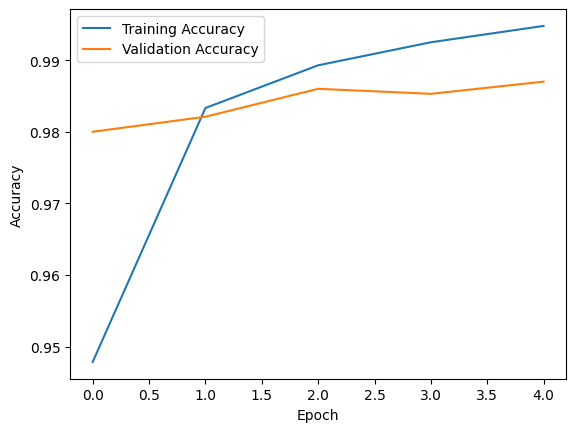

313/313 [==============================] - 1s 2ms/step - loss: 0.0088 - accuracy: 0.9882
Model with Hyperparameters: {'filters': 64, 'kernel_size': (3, 3), 'pool_size': (2, 2)}
Test Accuracy: 0.9882000088691711
Test Loss: 0.00877624936401844


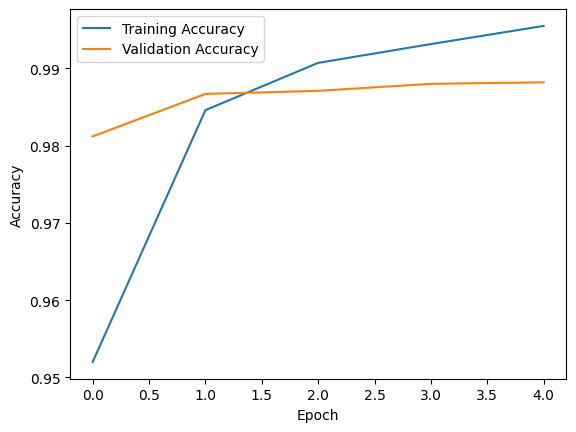

313/313 [==============================] - 1s 2ms/step - loss: 0.0090 - accuracy: 0.9867
Model with Hyperparameters: {'filters': 64, 'kernel_size': (3, 3), 'pool_size': (4, 4)}
Test Accuracy: 0.9866999983787537
Test Loss: 0.0089996587485075


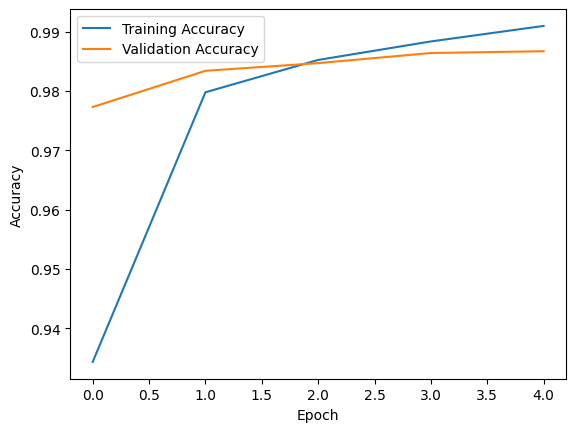

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 2: Change the hyperparameters of the classification model and analyze performance
hyperparameter_combinations = [
    {'filters': 32, 'kernel_size': (3, 3), 'pool_size': (2, 2)},
    {'filters': 64, 'kernel_size': (3, 3), 'pool_size': (2, 2)},
    {'filters': 64, 'kernel_size': (3, 3), 'pool_size': (4, 4)},
    # Add more hyperparameter combinations as needed
]

for hyperparameters in hyperparameter_combinations:
    model = Sequential()
    model.add(Conv2D(hyperparameters['filters'],
                     kernel_size=hyperparameters['kernel_size'],
                     activation='relu',
                     input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=hyperparameters['pool_size']))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(x_test, y_test)

    # Print metrics and hyperparameters
    print(f'Model with Hyperparameters: {hyperparameters}')
    print(f'Test Accuracy: {test_accuracy}')
    print(f'Test Loss: {test_loss}')

    # Plot training history
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
